# SpaceX Falcon 9 First Stage Landing Prediction
   
#   Assignment:   Exploring and Preparing Data

# Objectives
# 1.  Exploratory Data Analysis
# 2.  Preparing Data Feature Engineering

In [1]:
# import important Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [3]:
# Read the SpaceX dataset into a Pandas dataframe and print its summary

df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
# See how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

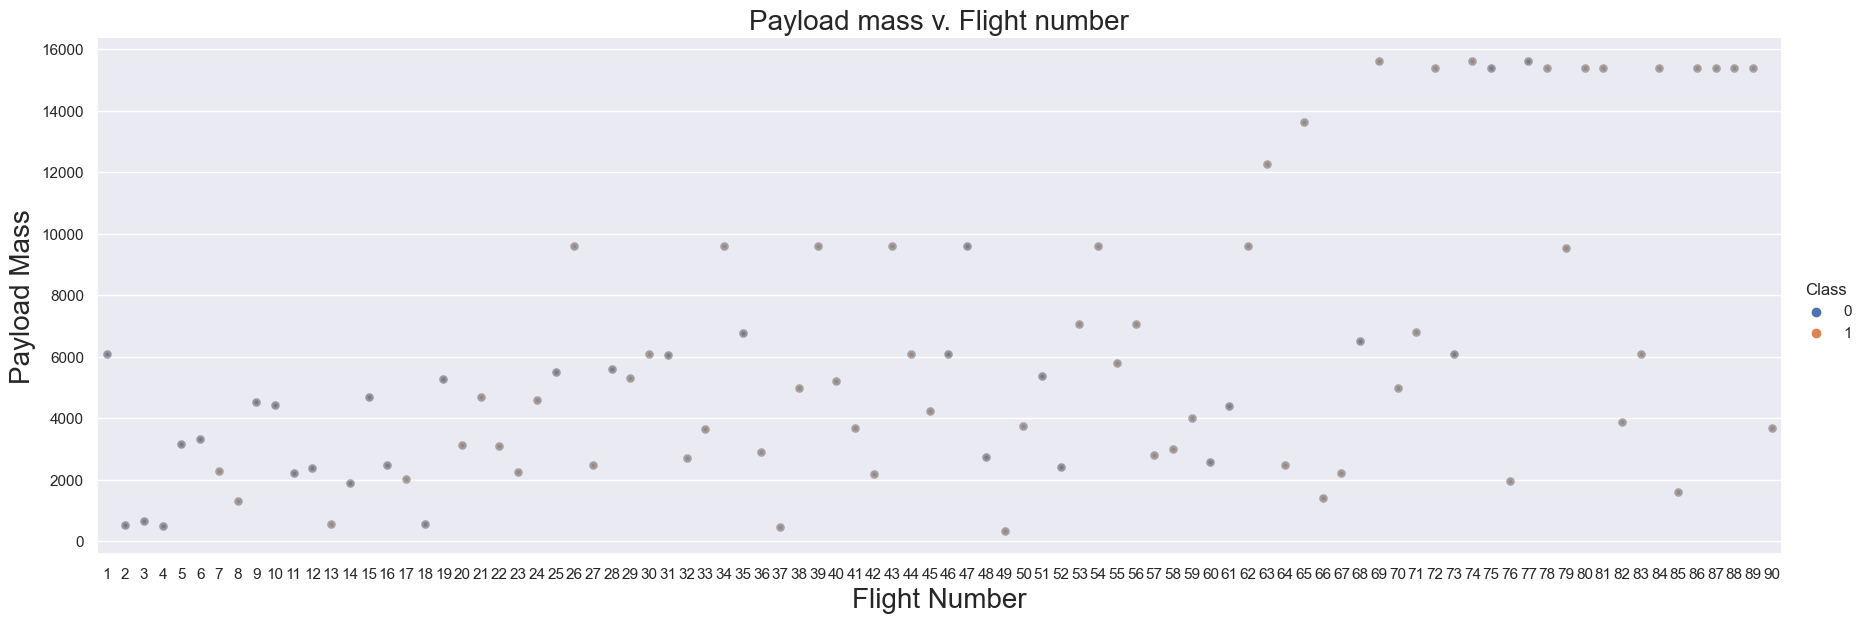

In [15]:
#sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
#plt.xlabel("Flight Number",fontsize=20)
#plt.ylabel("Pay load Mass (kg)",fontsize=20)
#plt.show()

sns.set(font_scale = 1)
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, s=10,
               alpha=0.5, linewidth=3, height=6, aspect=3)
plt.title("Payload mass v. Flight number",fontsize=20)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Payload Mass",fontsize=20)
plt.show()

# TASK 1: Visualize the relationship between Flight Number and Launch Site

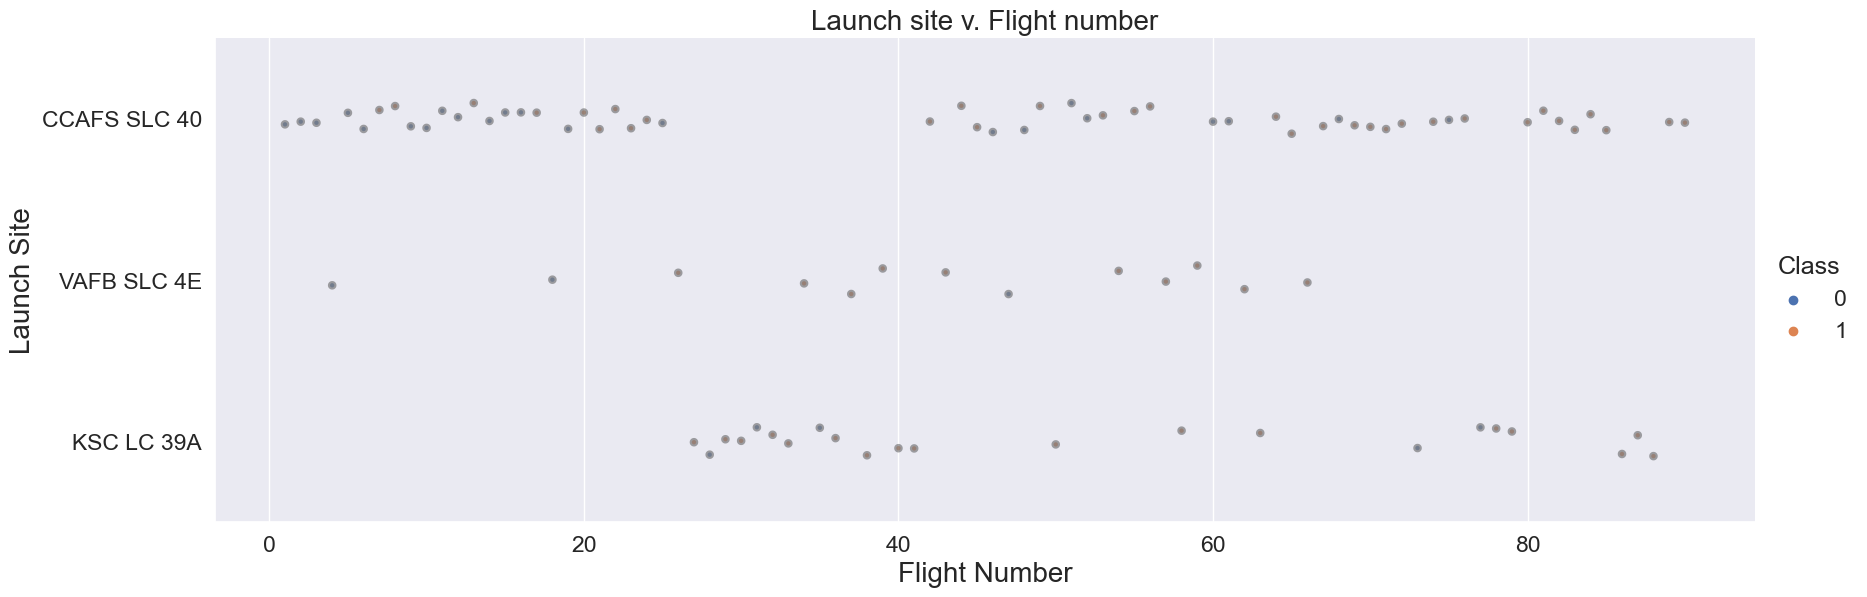

In [16]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

#sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", kind="swarm", data=df, aspect = 3)

#sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", kind="swarm", data=df, s=10,
#               alpha=0.5, linewidth=3, height=6, aspect=3)
sns.set(font_scale = 1.5)
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, s=10,
               alpha=0.5, linewidth=3, height=6, aspect=3)
plt.title("Launch site v. Flight number",fontsize=20)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

# TASK 2: Visualize the relationship between Payload and Launch Site

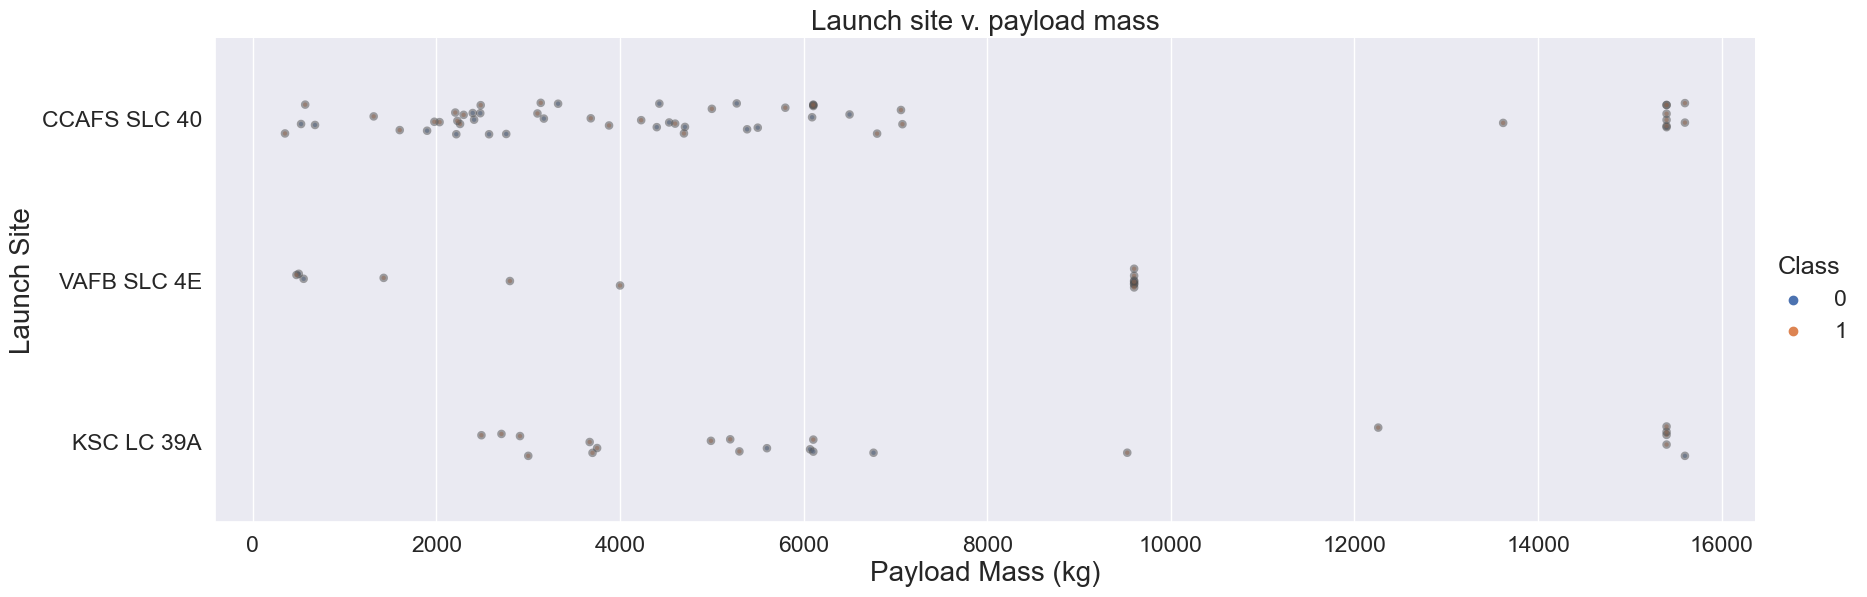

In [17]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value


sns.set(font_scale = 1.5)
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, s=10,
               alpha=0.5, linewidth=3, height=6, aspect=3)
plt.title("Launch site v. payload mass",fontsize=20)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

# TASK  3: Visualize the relationship between success rate of each orbit type

<Figure size 1200x700 with 0 Axes>

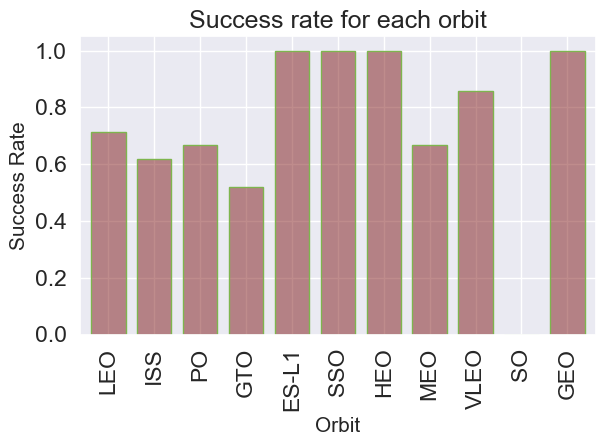

In [19]:

# Assuming you have a DataFrame df
df['Orbit_Success_Mean'] = df.groupby('Orbit')['Class'].transform('mean')

plt.figure(figsize=(12, 7))
df[['Orbit', 'Orbit_Success_Mean']].drop_duplicates().plot(kind='bar', x='Orbit', y='Orbit_Success_Mean',
                                                          title="Success rate for each orbit",
                                                          width=0.75, color=(0.5, 0.1, 0.1, 0.5),
                                                          edgecolor='#7eb54e', legend=False)
plt.xlabel("Orbit", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.tight_layout()
plt.show()

# Drop the temporary column
df.drop(columns=['Orbit_Success_Mean'], inplace=True)


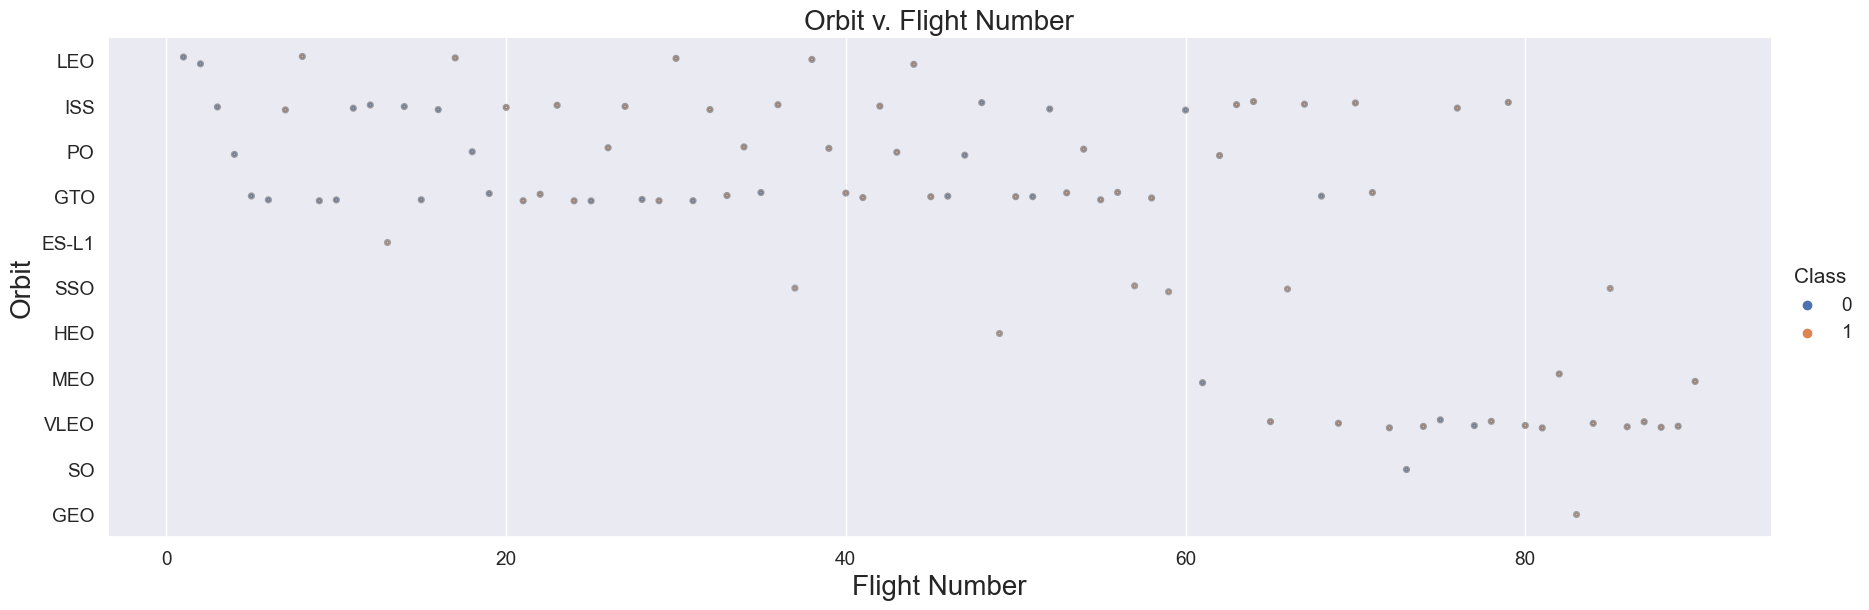

In [20]:
# TASK  4: Visualize the relationship between FlightNumber and Orbit type

# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.set(font_scale = 1.25)
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, s=10,
               alpha=0.5, linewidth=2, height=6, aspect=3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.title("Orbit v. Flight Number",fontsize=20)
plt.show()

# TASK 5: Visualize the relationship between Payload and Orbit type

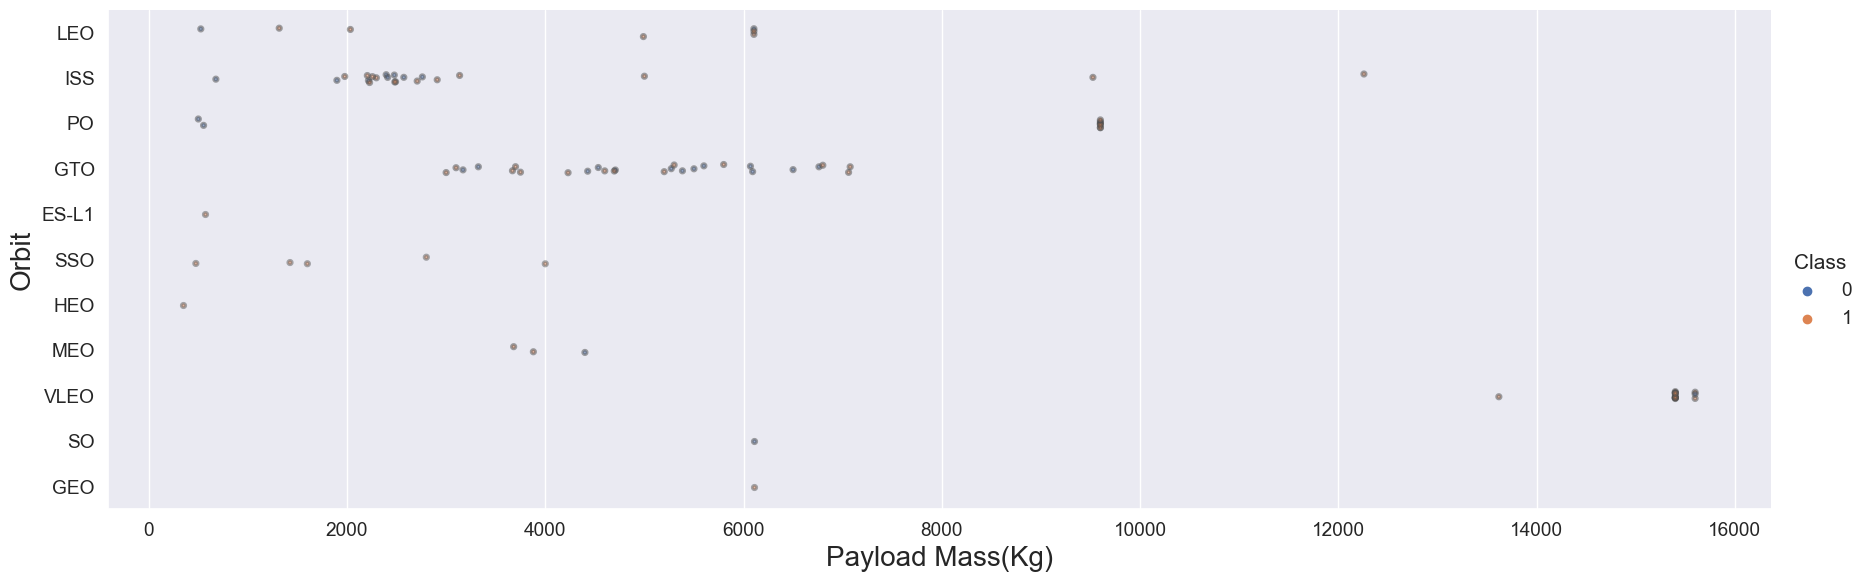

In [22]:
#Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.set(font_scale = 1.25)
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, s=10,
               alpha=0.5, linewidth=2, height=6, aspect=3)
#sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 3)
plt.xlabel("Payload Mass(Kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

#  TASK  6: Visualize the launch success yearly trend

In [23]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

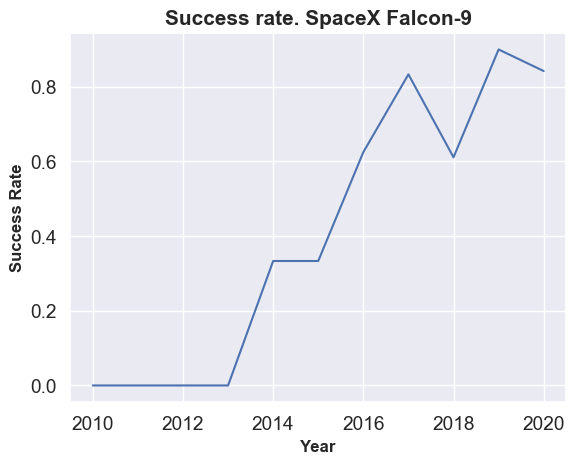

In [24]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df['Year'] = pd.DataFrame(Extract_year(df['Date'])).astype('int')
sns.lineplot(x = df['Year'].unique() , y = df.groupby(['Year'])['Class'].mean()) 
#plt.xlabel("Years",fontsize=20)
#plt.ylabel("Success Rate",fontsize=20)
plt.xlabel("Year",fontsize=12, fontweight='bold')
plt.ylabel("Success Rate",fontsize=12, fontweight='bold')
#plt.plot(X,total_launches)
plt.title("Success rate. SpaceX Falcon-9", fontsize=15, fontweight='bold')
plt.show()

# Features Engineering

In [25]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head(5)

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


# TASK  7: Create dummy variables to categorical columns

In [26]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit','LaunchSite','LandingPad','Serial','GridFins','Reused','Legs'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1,6104.959412,1,1.0,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
1,2,525.000000,1,1.0,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
2,3,677.000000,1,1.0,0,False,False,False,False,True,...,False,False,False,False,True,False,True,False,True,False
3,4,500.000000,1,1.0,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
4,5,3170.000000,1,1.0,0,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False


# TASK  8: Cast all numeric columns to `float64`

In [28]:
# HINT: use astype function
features_one_hot.astype('float64').dtypes

FlightNumber     float64
PayloadMass      float64
Flights          float64
Block            float64
ReusedCount      float64
                  ...   
GridFins_True    float64
Reused_False     float64
Reused_True      float64
Legs_False       float64
Legs_True        float64
Length: 83, dtype: object

In [29]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)